<a href="https://colab.research.google.com/github/rakesh-choudhury/dump/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Datasets/Final_YouTube_Dataset/YouTube.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,Country,Category,like_percentage,popular,tags_clean,sent_score
0,0,0,0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Cannada,Music_videos,94.773995,1,Eminem Walk On Water Aftermath Shady Interscop...,0.0
1,1,1,1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,Cannada,Pranks,98.696344,0,plush bad unboxing unboxing fan mail idubbbztv...,0.5
2,2,2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Cannada,Pranks,96.472974,1,racist superman rudy mancuso king bach racist ...,-0.6
3,3,3,3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Cannada,Youtube_Celebrities,98.518193,1,ryan higa higatv nigahiga i dare you idy rhpc ...,-0.3
4,4,4,4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,Cannada,Music_videos,98.726326,1,edsheeran ed sheeran acoustic live cover offic...,0.0


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le_category = LabelEncoder()

In [0]:
# New variable that is the prodcut of popular and like_percentage

#df['pop_per'] = (df['popular']*df['like_percentage'])
df['pop_per'] = df['views']
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,Country,Category,like_percentage,popular,tags_clean,sent_score,pop_per
0,0,0,0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Cannada,Music_videos,94.773995,1,Eminem Walk On Water Aftermath Shady Interscop...,0.0,17158579.0
1,1,1,1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,Cannada,Pranks,98.696344,0,plush bad unboxing unboxing fan mail idubbbztv...,0.5,1014651.0
2,2,2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Cannada,Pranks,96.472974,1,racist superman rudy mancuso king bach racist ...,-0.6,3191434.0
3,3,3,3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Cannada,Youtube_Celebrities,98.518193,1,ryan higa higatv nigahiga i dare you idy rhpc ...,-0.3,2095828.0
4,4,4,4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,Cannada,Music_videos,98.726326,1,edsheeran ed sheeran acoustic live cover offic...,0.0,33523622.0


In [0]:
inputs = df[['like_percentage', 'pop_per']]
inputs.head()

,like_percentage,pop_per
0,94.773995,17158579.0
1,98.696344,1014651.0
2,96.472974,3191434.0
3,98.518193,2095828.0
4,98.726326,33523622.0


In [0]:
inputs['category_n'] = le_category.fit_transform(inputs['like_percentage'])
inputs['pop_per_n'] = df['pop_per']
inputs.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,like_percentage,pop_per,category_n,pop_per_n
0,94.773995,17158579.0,60206,17158579.0
1,98.696344,1014651.0,122108,1014651.0
2,96.472974,3191434.0,78438,3191434.0
3,98.518193,2095828.0,117718,2095828.0
4,98.726326,33523622.0,122905,33523622.0


In [0]:
del inputs['pop_per']

In [0]:
inputs.head()

,like_percentage,category_n,pop_per_n
0,94.773995,60206,17158579.0
1,98.696344,122108,1014651.0
2,96.472974,78438,3191434.0
3,98.518193,117718,2095828.0
4,98.726326,122905,33523622.0


In [0]:
inputs_n = inputs.drop(['category_n'], axis = 'columns')
inputs_n.head()

,like_percentage,pop_per_n
0,94.773995,17158579.0
1,98.696344,1014651.0
2,96.472974,3191434.0
3,98.518193,2095828.0
4,98.726326,33523622.0


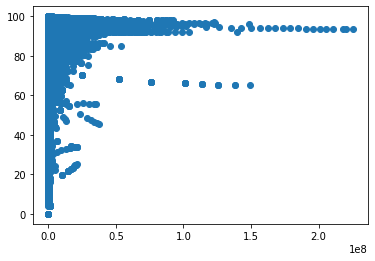

In [0]:
plt.scatter(inputs_n['pop_per_n'], inputs_n['like_percentage'])

In [0]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
inputs_n = inputs_n.dropna()

In [0]:
inputs_n.isnull().sum()

like_percentage    0
pop_per_n          0
dtype: int64

In [0]:
inputs_n['pop_per_n'] = inputs_n['pop_per_n'].replace(np.nan, 0)
inputs_n.shape

(237785, 2)

In [0]:
y_predicted = km.fit_predict(inputs_n[['like_percentage', 'pop_per_n']])
y_predicted

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [0]:
inputs_n['cluster'] = y_predicted
inputs_n.head()

,like_percentage,pop_per_n,cluster
0,94.773995,17158579.0,1
1,98.696344,1014651.0,0
2,96.472974,3191434.0,0
3,98.518193,2095828.0,0
4,98.726326,33523622.0,1


No handles with labels found to put in legend.


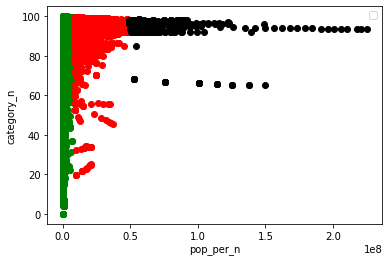

In [0]:
inputs_n1 = inputs_n[inputs_n.cluster==0]
inputs_n2 = inputs_n[inputs_n.cluster==1]
inputs_n3 = inputs_n[inputs_n.cluster==2]

plt.scatter(inputs_n1['pop_per_n'], inputs_n1['like_percentage'], color='green')
plt.scatter(inputs_n2['pop_per_n'], inputs_n2['like_percentage'], color='red')
plt.scatter(inputs_n3['pop_per_n'], inputs_n3['like_percentage'], color='black')

plt.xlabel('pop_per_n')
plt.ylabel('category_n')
plt.legend()

In [0]:
scaler = MinMaxScaler()
scaler.fit(inputs_n[['pop_per_n']])
inputs_n['pop_per_n'] = scaler.transform(inputs_n[['pop_per_n']])

scaler.fit(inputs_n[['like_percentage']])
inputs_n['like_percentage'] = scaler.transform(inputs_n[['like_percentage']])

In [0]:
inputs_n.head()

,like_percentage,pop_per_n,cluster
0,0.947740,0.076188,1
1,0.986963,0.004504,0
2,0.964730,0.014170,0
3,0.985182,0.009305,0
4,0.987263,0.148853,1


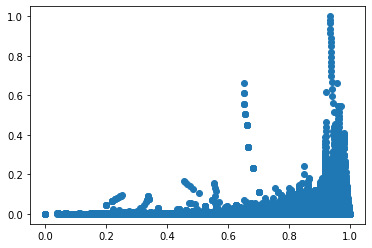

In [0]:
plt.scatter(inputs_n['like_percentage'], inputs_n['pop_per_n'])

In [0]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(inputs_n[['like_percentage', 'pop_per_n']])
y_predicted

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

In [0]:
inputs_n['cluster'] = y_predicted
inputs_n.head()

,like_percentage,pop_per_n,cluster
0,0.947740,0.076188,0
1,0.986963,0.004504,0
2,0.964730,0.014170,0
3,0.985182,0.009305,0
4,0.987263,0.148853,0


In [0]:
km.cluster_centers_

array([[0.96043226, 0.00487166],
       [0.80962116, 0.00309937],
       [0.49905431, 0.00231608]])

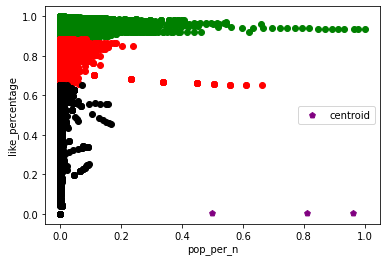

In [0]:
inputs_n1 = inputs_n[inputs_n.cluster==0]
inputs_n2 = inputs_n[inputs_n.cluster==1]
inputs_n3 = inputs_n[inputs_n.cluster==2]

plt.scatter(inputs_n1['pop_per_n'], inputs_n1['like_percentage'], color='green')
plt.scatter(inputs_n2['pop_per_n'], inputs_n2['like_percentage'], color='red')
plt.scatter(inputs_n3['pop_per_n'], inputs_n3['like_percentage'], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='p',label='centroid')
plt.xlabel('pop_per_n')
plt.ylabel('like_percentage')
plt.legend()

In [7]:
!pip install streamlit

     |████████████████████████████████| 7.1MB 2.4MB/s 
     |████████████████████████████████| 5.3MB 20.1MB/s 
     |████████████████████████████████| 112kB 46.3MB/s 
     |████████████████████████████████| 522kB 45.9MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 122kB 46.8MB/s 
  Created wheel for validators: filename=validators-0.14.3-cp36-none-any.whl size=17284 sha256=883f8d1ea4c9396eda3141b9d793e0fbb1405b00bbedf1910e41f10724ae2bbd
  Stored in directory: /root/.cache/pip/wheels/e2/b2/03/20ab3c26e9faacd78dc775bad6157d295539d07e80f2c5de8e
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13449 sha256=54c1d6ceec7cf0eb589775e45f15de3dacf39922c329bb19b329db175f8350c6
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for tornado: filename=tornado-5.1.1-cp36-cp36m-linux_x86_64.whl size=462330 sha256=efcce20059cd18876e673f034a7156ccd927441a5

In [8]:
# How to run a Dash app in Google Colab

### Install ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-04-23 14:19:13--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.231.129.73, 52.73.120.139, 52.86.137.228, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.231.129.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  51.8MB/s    in 0.3s    

2020-04-23 14:19:14 (51.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [28]:
get_ipython().system_raw('./ngrok http 8501 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://a26047f3.ngrok.io


In [29]:
!streamlit run Integrated.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.229.50.236:8501

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

NumExpr defaulting to 2 threads.
  Stopping...
  Stopping...
